In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load dataset

df = pd.read_csv('Churn_Modelling.csv')

In [4]:
Churn_modelling = pd.read_csv('Churn_modelling.csv')

In [6]:
Churn_modelling

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
#view dimensions of dataset

df.shape

(10000, 14)

In [8]:
#encode categorical variables

df = pd.get_dummies(df)

In [9]:
#splitting dataset to test and train sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis = 1), df['Exited'], test_size = 0.2, random_state=42)

In [10]:
#check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 2947), (2000, 2947))

In [11]:
#create heterogeneous ensemble random forest classifier; Create base classifier

rf1 = RandomForestClassifier(n_estimators = 50, random_state = 42)
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
lr = LogisticRegression(random_state = 42)

In [12]:
#create heterogeneous ensemble classifier

hetero_rf = VotingClassifier(estimators=[('rf1', rf1), ('dt', dt), ('lr', lr)], voting = 'hard')

In [13]:
#train the classifier on training set

hetero_rf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf1',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [14]:
#predict based on the test set

y_pred = hetero_rf.predict(X_test)

In [15]:
#evaluting performance of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#calculate accuracy

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8525


In [16]:
#calculate precision

print('Precision:', precision_score(y_test, y_pred))

Precision: 0.8656716417910447


In [17]:
#calculate recall

print('Recall:', recall_score(y_test, y_pred))

Recall: 0.2951653944020356


In [18]:
#calcuate F1 score

print('F1 score:', f1_score(y_test, y_pred))

F1 score: 0.44022770398481964


Confusion matrix

 [[1589   18]
 [ 277  116]]


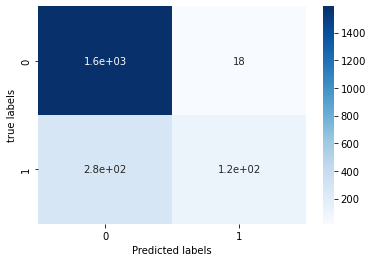

In [22]:
#confusion matrix plot

cm =  confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt

print('Confusion matrix\n\n', cm)

#plot heatmap

sns.heatmap(cm, annot = True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('true labels')
plt.show()

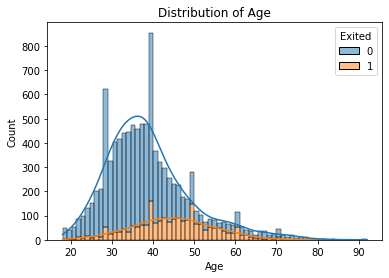

In [24]:
#plot a histogram of the age distribution

sns.histplot(data=df, x='Age', hue='Exited', kde=True, multiple='stack')
plt.title('Distribution of Age')
plt.show()